# Autocorrelation

[Link to the Video](https://www.youtube.com/watch?v=GcJ__g_cimA&list=PLKmQjl_R9bYd32uHImJxQSFZU5LPuXfQe&index=6)

In [6]:
import sympy as sym
import pandas as pd
import numpy as np
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf
sym.init_printing()
from IPython.display import display, Math
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In time series analysis we often make inferences about the past to produce forecasts about the future. In order for this process to be successful, we must diagnose our time series thoroughly.

One such diagnosis method is autocorrelation. This helps us detect certain features in our series to enable us to choose the most optimal forecasting model for our data.

## What is Autocorrelation?

Autocorrelation is just the correlation of the data with itself. So, instead of measuring the correlation between two random variables, we are measuring the correlation between a random variable against itself. Hence, why it is called auto-correlation.

Correlation is how strongly two variables are related to each other. If the value is 1, the variables are perfectly positively correlated, -1 they are perfectly negatively correlated and 0 there is no correlation.

For time-series, the autocorrelation is the correlation of that time series at two different points in time (also known as lags). In other words, we are measuring the time series against some lagged version of itself.

![autocorrelation](../images/autocorrelation.png)

Where N is the length of the time series y and k is the specific lag of the time series. So, when calculating r_1 we are computing the correlation between y_t and y_{t-1}.

The autocorrelation between y_t and y_t would be 1 as they are identical.

## Why is it useful

As stated above, we use autocorrelation to measure the correlation of a time series with a lagged version of itself. This computation allows us to gain some interesting insight into the characteristics of our series:

Seasonality: Lets say we find the correlation at certain lag multiples is in general higher than others. This means we have some seasonal component in our data. For example, if we have daily data and we find that every multiple of 7 lag term is higher than others, we probably have some weekly seasonality.

Trend: If the correlation for recent lags is higher and slowly decreases as the lags increase, then there is some trend in our data. Therefore, we would need to carry out some differencing to render the time series stationary.

In [7]:
data = pd.read_csv('../data/airline.csv', index_col=0, parse_dates=True)
data.index = pd.to_datetime(data.index)

# Plot the data
fig = px.line(data, x=data.index, y='#Passengers',
              labels=({'#Passengers': 'Passengers', 'Month': 'Date'}))

fig.update_layout(template="simple_white", font=dict(size=18),
                  title_text='Airline Passengers', width=650, title_x=0.5, height=400)

fig.show()

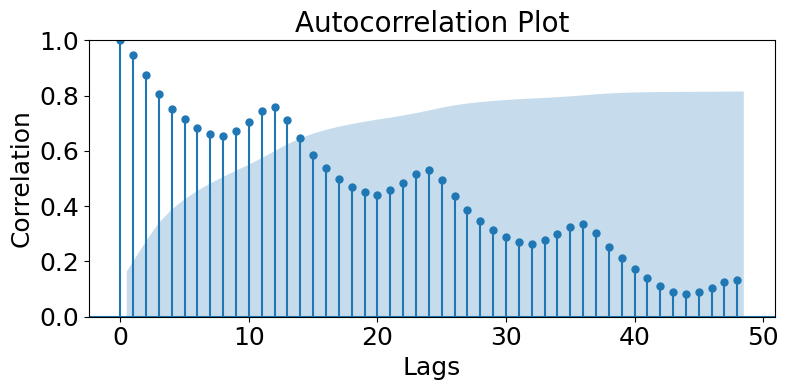

In [8]:
# Plot autocorrelation
plt.rc("figure", figsize=(8,4))
plot_acf(data['#Passengers'], lags=48)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

We observe the following:

There is a clear cyclical pattern in the lags every multiple of 12. As our data is indexed by month, we therefore have a yearly seasonality in our data.

The strength of correlation is generally and slowly decreasing as the lags increase. This points to a trend in our data and it needs to be differenced to make it stationary when modelling.

The blue region signifies which lags are statistically significant. Therefore, when building a forecast model for this data, the next month forecast should probably only consider ~15 of the previous values due to their statistical significance.